In [2]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import xlwt
from xlwt import Workbook

In [1]:
def create_fastCN_summary_from_file(sample):
    # initializes chr_dict
    # key = chromosome number
    # value = list of two elements: # of duplications, total bp of duplications
    chr_dict = {}
    
    # opens chrom sizes for %
    e = open("{}.sorted.chrom.sizes".format(sample), 'rt')
    chromFile = e.readlines()
    chr_size_dict = {}
    for line in chromFile:
        line = line.rstrip().split()
        chro = line[0]
        size = int(line[1])
        if "chrUn" in chro or "scaffold" in chro or "CTF" in chro:
            if "chrUn" not in chr_size_dict.keys():
                chr_size_dict["chrUn"] = size
            else:
                chr_size_dict["chrUn"] += size
        elif "chrY" in chro:
            if "chrY" not in chr_size_dict.keys():
                chr_size_dict["chrY"] = size
            else:
                chr_size_dict["chrY"] += size
        elif "chrM" in chro:
            if "chrM" not in chr_size_dict.keys():
                chr_size_dict["chrM"] = size
            else:
                chr_size_dict["chrM"] += size
        else:
            chr_size_dict[chro] = size
            
        if "total" not in chr_size_dict.keys():
            chr_size_dict["total"] = size
        else:
            chr_size_dict["total"] += size
            
        if "chrY" not in chr_size_dict.keys():
            chr_size_dict["chrY"] = 1
        if "chrUn" not in chr_size_dict.keys():
            chr_size_dict["chrUn"] = 1
        if "chrM" not in chr_size_dict.keys():
            chr_size_dict["chrM"] = 1
    e.close()
    
    
    # fills in keys for chr_dict, alters first value of list per dup present 
    if sample == "mischka":
        f = open("mischka_fastCN_segdups.bed", 'rt')
    else:
        f = open("{}_self.fastcn_segdups.bed".format(sample), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        chro = line[0]
        if "chrUn" in chro or "scaffold" in chro or "CTF" in chro:
            chro = "chrUn"
        if "chrY" in chro:
            chro = "chrY"
        if "chrM" in chro:
            chro = "chrM"
        dup_size = int(line[2]) - int(line[1])
        if dup_size < 10000:
            continue
        if chro not in chr_dict.keys():
            chr_dict[chro] = [0, 0, 0]
        chr_dict[chro][0] += 1
        chr_dict[chro][1] += dup_size
    f.close()
    
    for key, values in chr_dict.items():
        values[2] = round(values[1] / chr_size_dict[key], 5) * 100

    bad_chro = ["chrUn", "chrY", "chrM"]
    # creates one more key: "total" for all dups, all bp
    total_dups = 0
    total_bp = 0
    for chro, values in chr_dict.items():
        if chro not in bad_chro:
            total_dups += values[0]
            total_bp += values[1]
    total_percent = round(total_bp / chr_size_dict["total"], 4) * 100
    
    chr_dict["total"] = [total_dups, round(total_bp/1000000, 2), total_percent]
    
    return chr_dict

In [6]:
def create_hist_from_file(sample):
    sample_hist = []
    f = open("{}_fastCN_segdups.bed".format(sample), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        sample_hist.append(int(line[2]) - int(line[1]))
    f.close()
    fig, ax = plt.subplots(1, 1)
    ax.hist(sample_hist,  bins = 100)
    
    ax.set_title("{} fastCN Dups".format(sample))
    ax.set_xlabel("Duplication Size")
    ax.set_ylabel("Number of Duplications".format(sample))

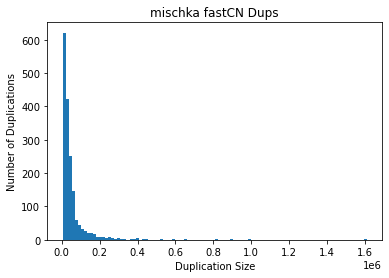

In [9]:
UU_Cfam = create_fastCN_summary_from_file("mischka")
UU_Cfam_hist = create_hist_from_file("mischka")

In [3]:
dog_samples = ["mischka","tasha", "zoey", "mCanLor1.2", "yella", "nala", "wags", "sandy", "china"]

In [4]:
dog_fastCN_summary = {}
for dog in dog_samples:
    dog_fastCN_summary[dog] = create_fastCN_summary_from_file(dog)["total"]
dog_fastCN_summary

{'mischka': [1033, 56.21, 2.26],
 'tasha': [990, 42.53, 1.8399999999999999],
 'zoey': [726, 41.48, 1.77],
 'mCanLor1.2': [2069, 123.14, 5.029999999999999],
 'yella': [1059, 98.36, 4.109999999999999],
 'nala': [4706, 152.38, 6.329999999999999],
 'wags': [688, 45.57, 1.8900000000000001],
 'sandy': [1681, 55.13, 2.35],
 'china': [7977, 111.17, 4.74]}

In [34]:
dog_fastCN_all_chro = {}
for dog in dog_samples:
    dog_fastCN_all_chro[dog] = create_fastCN_summary_from_file(dog)
dog_fastCN_all_chro

{'mischka': {'chr1': [83, 2618960, 2.12],
  'chr10': [24, 1433310, 2.029],
  'chr11': [36, 3192091, 4.267],
  'chr12': [26, 529109, 0.7250000000000001],
  'chr13': [24, 1018932, 1.585],
  'chr14': [27, 1333298, 2.182],
  'chr15': [26, 1145507, 1.771],
  'chr16': [45, 3035387, 5.029],
  'chr17': [44, 1893628, 2.9090000000000003],
  'chr18': [53, 3086892, 5.466],
  'chr19': [29, 1401303, 2.524],
  'chr2': [35, 3121721, 3.6740000000000004],
  'chr20': [38, 1270485, 2.167],
  'chr21': [40, 2085902, 4.031],
  'chr22': [18, 381882, 0.62],
  'chr23': [18, 636581, 1.198],
  'chr24': [28, 1106273, 2.278],
  'chr25': [17, 1260964, 2.4379999999999997],
  'chr26': [43, 3474149, 8.85],
  'chr27': [46, 1360634, 2.916],
  'chr28': [15, 417895, 1.001],
  'chr29': [8, 284280, 0.6689999999999999],
  'chr3': [26, 836687, 0.905],
  'chr30': [15, 609501, 1.5],
  'chr31': [16, 800059, 2.005],
  'chr32': [7, 381898, 0.9490000000000001],
  'chr33': [16, 553630, 1.7229999999999999],
  'chr34': [10, 650290, 1.5

In [35]:
dog_chr26 = {}
for dog in dog_samples:
    dog_chr26[dog] = create_fastCN_summary_from_file(dog)["chr26"]
dog_chr26

{'mischka': [43, 3474149, 8.85],
 'tasha': [32, 1800266, 4.649],
 'zoey': [42, 2568597, 6.6850000000000005],
 'mCanLor1.2': [83, 11017903, 23.895],
 'yella': [42, 2218304, 5.832],
 'nala': [240, 8172461, 20.213],
 'wags': [37, 5908293, 14.199],
 'sandy': [82, 2615586, 6.843000000000001],
 'china': [1365, 9149000, 24.083]}

In [36]:
chr_list = ['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chr23',
 'chr24',
 'chr25',
 'chr26',
 'chr27',
 'chr28',
 'chr29',
 'chr30',
 'chr31',
 'chr32',
 'chr33',
 'chr34',
 'chr35',
 'chr36',
 'chr37',
 'chr38',
 'chrX']

In [37]:
chr_xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,"X"]

In [38]:
def create_plot_from_chrbp_all():
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    ax.set_ylim(top = 10)
    
    for dog_name in dog_samples:
        if dog_name != "mischka":
            continue
        f = open("{}.sorted.chrom.sizes".format(dog_name), 'rt')
        inFile = f.readlines()
        chr_size_dict = {}
        for line in inFile:
            line = line.rstrip().split()
            chro = line[0]
            bp_size = float(line[1])
            if "chrX" in chro:
                continue
            elif "chrY" in chro:
                continue
            elif "chrM" in chro:
                continue
            elif "chrUn" in chro:
                continue
            elif "scaffold" in chro or "CTG" in chro:
                continue
            else:
                chr_size_dict[line[0]] = int(line[1])
        f.close()

        # get total duplicated BP 
        chr_sizes = list(chr_size_dict.values())
        sample_scatter = []
        for chro in chr_list:
            if chro in dog_fastCN_all_chro[dog_name].keys():
                sample_scatter.append(dog_fastCN_all_chro[dog_name][chro][2])
            else:
                sample_scatter.append(0)

        # create plot
        chr_count = []
        for i in range(len(chr_list)):
            chr_count.append(i + 1)
        ax.plot(chr_count, sample_scatter, label = str(dog_name), marker = 'o')
        ax.legend(loc = 'upper left', prop={'size': 15})
    
        # set labels for chro
        plt.xticks(np.arange(min(chr_count), max(chr_count)+1, 1.0), chr_xticks)
        ax.set_title("% Duplicated BP")
        ax.set_xlabel("Chromosome Number")
        ax.set_ylabel("% of Duplicated BP")
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(15)

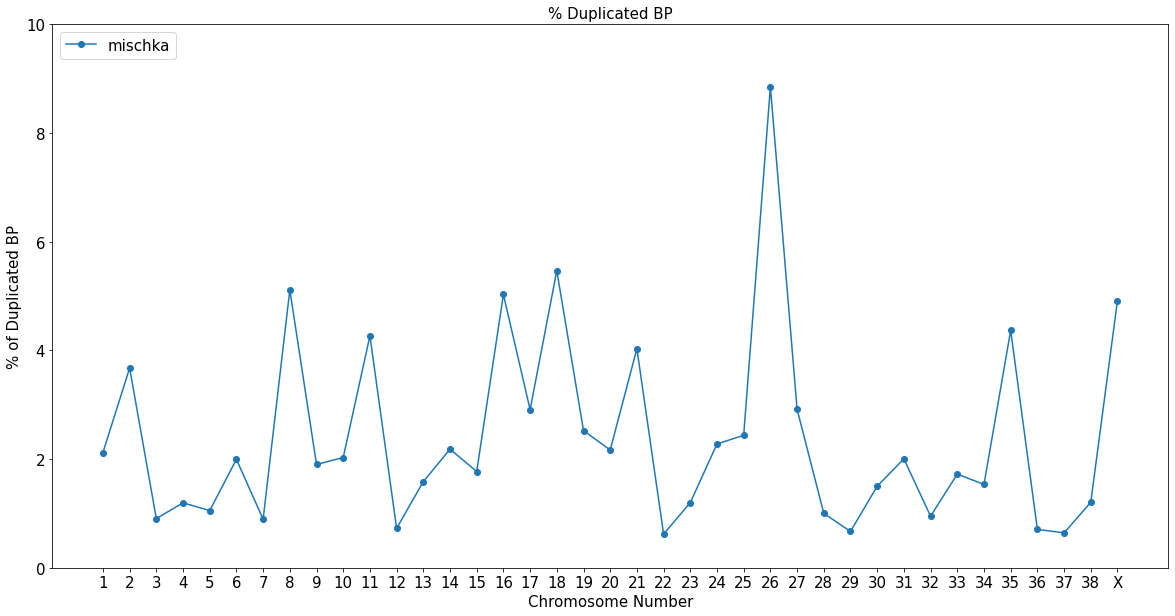

In [39]:
create_plot_from_chrbp_all()

In [15]:
def open_gene_intersect(sample):
    f = open("{}_fastcn_segdups_gene_intersect.bed".format(sample), 'rt')
    inFile = f.readlines()
    gene_chr_dict = {}
    for line in inFile:
        line = line.rstrip().split()
        chro = line[0]
        if "chrUn" in chro or "scaffold" in chro or "CTF" in chro:
            chro = "chrUn"
        if "chrY" in chro:
            chro = "chrY"
        if "chrM" in chro:
            chro = "chrM"
        gene = line[6]
        total_bp = int(line[7])
        if chro not in gene_chr_dict.keys():
            gene_chr_dict[chro] = [[], 0]
        gene_chr_dict[chro][0].append(gene)
        gene_chr_dict[chro][1] += total_bp 
    
    return gene_chr_dict

In [16]:
def create_plot_from_segdup_genes_bp_all():
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
    
    for dog_name in dog_samples:
        # get total duplicated BP in genes
        sample_scatter = []
        for chro in chr_list:
            if chro in dog_segdup_gene_summary[dog_name].keys():
                sample_scatter.append(int(dog_segdup_gene_summary[dog_name][chro][1]))
            else:
                sample_scatter.append(0)

        # create plot
        chr_count = []
        for i in range(len(chr_list)):
            chr_count.append(i + 1)
        ax.plot(chr_count, sample_scatter, label = str(dog_name))
        ax.legend(loc = 'upper left', prop={'size': 15})
    
    # set labels for chro
    plt.xticks(np.arange(min(chr_count), max(chr_count)+1, 1.0), chr_xticks)
    ax.set_title("# Duplicated BP in Canine Genes")
    ax.set_xlabel("Chromosome Number")
    ax.set_ylabel("# of Duplicated BP in Genes")
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

In [17]:
def create_plot_from_segdup_genes_count():
    fig, ax = plt.subplots(1, 1, figsize=(20,10))

    for dog_name in dog_samples:
        # get total duplicated BP in genes
        sample_scatter = []
        for chro in chr_list:
            if chro in dog_segdup_gene_summary[dog_name].keys():
                sample_scatter.append(len(dog_segdup_gene_summary[dog_name][chro][0]))
            else:
                sample_scatter.append(0)

        # create plot
        chr_count = []
        for i in range(len(chr_list)):
            chr_count.append(i + 1)
        ax.plot(chr_count, sample_scatter, label = str(dog_name))
        ax.legend(loc = 'upper left', prop={'size': 15})

    # set labels for chro
    plt.xticks(np.arange(min(chr_count), max(chr_count)+1, 1.0), chr_xticks)
    ax.set_title("Duplicated Gene Count")
    ax.set_xlabel("Chromosome Number")
    ax.set_ylabel("Number of Duplicated Genes")
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
         ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

In [18]:
dog_segdup_gene_summary = {}
for dog in dog_samples:
    dog_segdup_gene_summary[dog] = open_gene_intersect(dog)
dog_segdup_gene_summary

{'mischka': {'chr1': [['LOC100685702',
    'LOC491231',
    'LOC100684412',
    'LOC119876022',
    'LOC119869965',
    'LOC119876024',
    'LOC119876023',
    'LOC119875957',
    'LOC119875956',
    'LOC100685599',
    'LOC100683099',
    'LOC119869902',
    'LOC119875971',
    'LOC119869867',
    'LOC100856674',
    'LOC100688819',
    'LOC119871040',
    'LOC119871042',
    'LOC119870824',
    'LOC119870826',
    'LOC119875909',
    'LOC119875974',
    'LOC100686646',
    'LOC102151355',
    'LOC119875910',
    'LOC119870858',
    'LOC119875947',
    'LOC610384',
    'LOC119875981',
    'LOC111090791',
    'LOC119870860',
    'LOC119875982',
    'LOC106559537',
    'LOC100684129',
    'LOC119875983',
    'LOC119870868',
    'LOC119870875',
    'LOC119875986',
    'LOC100686907',
    'LOC106559250_1',
    'LOC119875989',
    'OR6Z2',
    'OR6Z1',
    'LOC119870273',
    'LOC119876021',
    'LOC119875993',
    'LOC119870929',
    'LOC119875918',
    'LOC119870934',
    'LOC111099005',

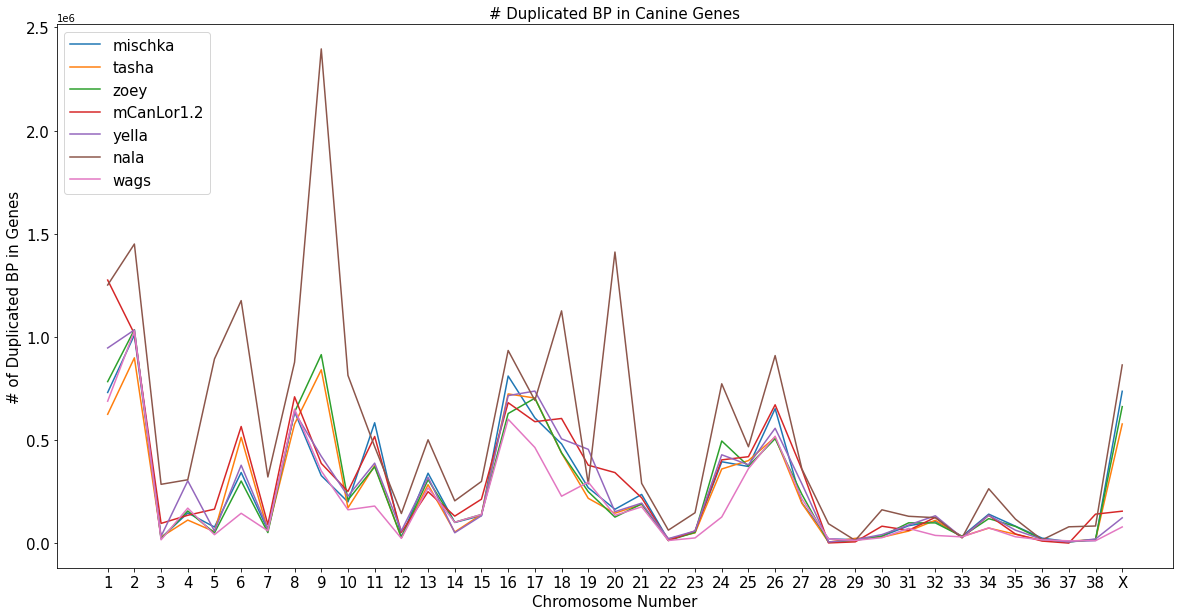

In [19]:
create_plot_from_segdup_genes_bp_all()

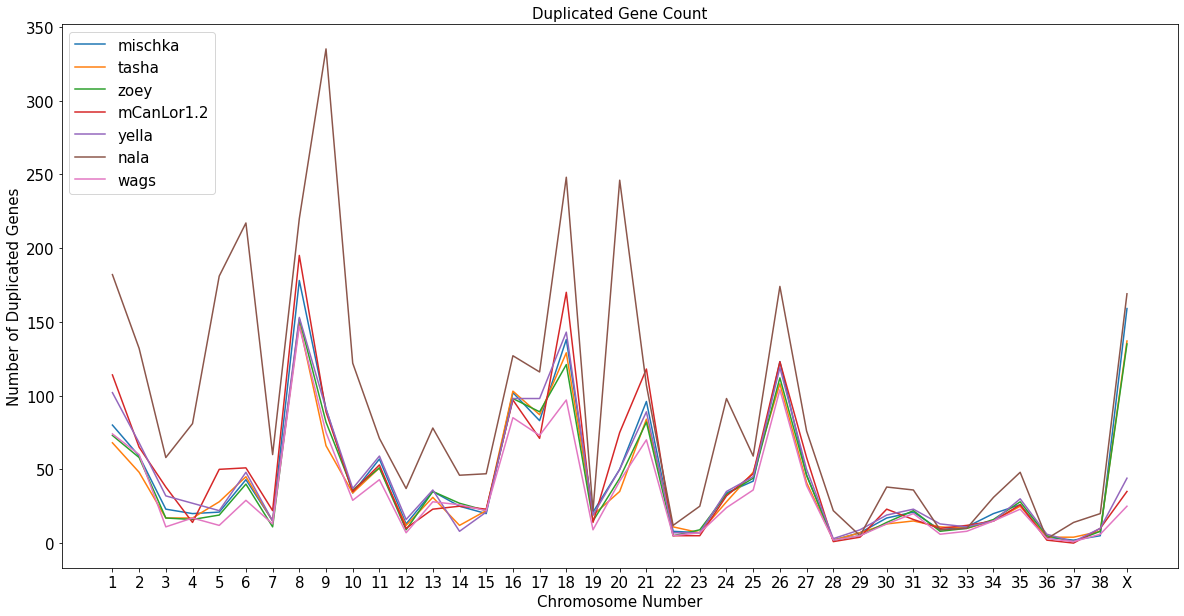

In [20]:
create_plot_from_segdup_genes_count()

In [21]:
dog_segdup_gene_summary

{'mischka': {'chr1': [['LOC100685702',
    'LOC491231',
    'LOC100684412',
    'LOC119876022',
    'LOC119869965',
    'LOC119876024',
    'LOC119876023',
    'LOC119875957',
    'LOC119875956',
    'LOC100685599',
    'LOC100683099',
    'LOC119869902',
    'LOC119875971',
    'LOC119869867',
    'LOC100856674',
    'LOC100688819',
    'LOC119871040',
    'LOC119871042',
    'LOC119870824',
    'LOC119870826',
    'LOC119875909',
    'LOC119875974',
    'LOC100686646',
    'LOC102151355',
    'LOC119875910',
    'LOC119870858',
    'LOC119875947',
    'LOC610384',
    'LOC119875981',
    'LOC111090791',
    'LOC119870860',
    'LOC119875982',
    'LOC106559537',
    'LOC100684129',
    'LOC119875983',
    'LOC119870868',
    'LOC119870875',
    'LOC119875986',
    'LOC100686907',
    'LOC106559250_1',
    'LOC119875989',
    'OR6Z2',
    'OR6Z1',
    'LOC119870273',
    'LOC119876021',
    'LOC119875993',
    'LOC119870929',
    'LOC119875918',
    'LOC119870934',
    'LOC111099005',

In [22]:
f = open("UU_Cfam_gene_directory.bed", "rt")
inFile = f.readlines()
all_genes = []
all_gene_chr = {}
gene_dict = {}
for line in inFile:
    line = line.rstrip().split()
    chro = line[0]
    all_genes.append(line[3])
    gene_dict[line[3]] = [line[0], line[1], line[2]]
    all_gene_chr[line[3]] = chro
f.close()

In [23]:
all_genes

['ENPP1',
 'LOC102151484',
 'LOC100685702',
 'LOC100685782',
 'LOC119870691',
 'PARD6G',
 'ADNP2',
 'LOC100685536',
 'LOC119870385',
 'RBFA',
 'LOC102154355',
 'TXNL4A',
 'TRNAQ-UUG_1',
 'HSBP1L1',
 'LOC111091658',
 'LOC111091673',
 'SLC66A2',
 'LOC106559849',
 'KCNG2',
 'CTDP1',
 'LOC119870433',
 'LOC111091841',
 'LOC119870619',
 'LOC111090558',
 'NFATC1',
 'LOC111091898',
 'LOC119875951',
 'ATP9B',
 'LOC119870460',
 'SALL3',
 'LOC111092007',
 'LOC111092029',
 'LOC119870620',
 'LOC102155992',
 'LOC111090560',
 'LOC119875935',
 'LOC111092037',
 'LOC119870622',
 'LOC119870623',
 'LOC111092046',
 'LOC119870694',
 'LOC111092121',
 'LOC111090561',
 'LOC111090563',
 'LOC119870625',
 'LOC111092137',
 'LOC111099015',
 'LOC119869905',
 'GALR1',
 'MBP',
 'ZNF236',
 'LOC102156552',
 'LOC119869861',
 'LOC119870510',
 'LOC119870626',
 'LOC111092394',
 'LOC111090565',
 'ZNF516',
 'LOC111092528',
 'LOC102157008',
 'LOC111092546',
 'LOC119870615',
 'LOC119870696',
 'LOC119870695',
 'TSHZ1',
 'LOC1110

In [24]:
all_gene_chr

{'ENPP1': 'chr1',
 'LOC102151484': 'chr1',
 'LOC100685702': 'chr1',
 'LOC100685782': 'chr1',
 'LOC119870691': 'chr1',
 'PARD6G': 'chr1',
 'ADNP2': 'chr1',
 'LOC100685536': 'chr1',
 'LOC119870385': 'chr1',
 'RBFA': 'chr1',
 'LOC102154355': 'chr1',
 'TXNL4A': 'chr1',
 'TRNAQ-UUG_1': 'chr1',
 'HSBP1L1': 'chr1',
 'LOC111091658': 'chr1',
 'LOC111091673': 'chr1',
 'SLC66A2': 'chr1',
 'LOC106559849': 'chr1',
 'KCNG2': 'chr1',
 'CTDP1': 'chr1',
 'LOC119870433': 'chr1',
 'LOC111091841': 'chr1',
 'LOC119870619': 'chr1',
 'LOC111090558': 'chr1',
 'NFATC1': 'chr1',
 'LOC111091898': 'chr1',
 'LOC119875951': 'chr1',
 'ATP9B': 'chr1',
 'LOC119870460': 'chr1',
 'SALL3': 'chr1',
 'LOC111092007': 'chr1',
 'LOC111092029': 'chr1',
 'LOC119870620': 'chr1',
 'LOC102155992': 'chr1',
 'LOC111090560': 'chr1',
 'LOC119875935': 'chr1',
 'LOC111092037': 'chr1',
 'LOC119870622': 'chr1',
 'LOC119870623': 'chr1',
 'LOC111092046': 'chr1',
 'LOC119870694': 'chr1',
 'LOC111092121': 'chr1',
 'LOC111090561': 'chr1',
 'LO

In [25]:
gene_dict

{'ENPP1': ['chr1', '209085', '282880'],
 'LOC102151484': ['chr1', '285958', '289821'],
 'LOC100685702': ['chr1', '325476', '329216'],
 'LOC100685782': ['chr1', '358506', '407981'],
 'LOC119870691': ['chr1', '454529', '455119'],
 'PARD6G': ['chr1', '455022', '536010'],
 'ADNP2': ['chr1', '569077', '604064'],
 'LOC100685536': ['chr1', '610658', '640615'],
 'LOC119870385': ['chr1', '640488', '646652'],
 'RBFA': ['chr1', '660385', '689553'],
 'LOC102154355': ['chr1', '674715', '682615'],
 'TXNL4A': ['chr1', '689716', '702621'],
 'TRNAQ-UUG_1': ['chr1', '708024', '708096'],
 'HSBP1L1': ['chr1', '710687', '714772'],
 'LOC111091658': ['chr1', '723179', '727560'],
 'LOC111091673': ['chr1', '725282', '727028'],
 'SLC66A2': ['chr1', '727548', '772828'],
 'LOC106559849': ['chr1', '737241', '737803'],
 'KCNG2': ['chr1', '772781', '828217'],
 'CTDP1': ['chr1', '856454', '915492'],
 'LOC119870433': ['chr1', '882207', '887257'],
 'LOC111091841': ['chr1', '931638', '936987'],
 'LOC119870619': ['chr1',

In [26]:
total_chro_count = {}
for dog, summary in dog_segdup_gene_summary.items():
    for chro, gene_list_and_bp in summary.items():
        gene_list = gene_list_and_bp[0]
        if chro not in total_chro_count.keys():
            total_chro_count[chro] = []
        total_chro_count[chro].extend(gene_list)

In [27]:
total_chro_count

{'chr1': ['LOC100685702',
  'LOC491231',
  'LOC100684412',
  'LOC119876022',
  'LOC119869965',
  'LOC119876024',
  'LOC119876023',
  'LOC119875957',
  'LOC119875956',
  'LOC100685599',
  'LOC100683099',
  'LOC119869902',
  'LOC119875971',
  'LOC119869867',
  'LOC100856674',
  'LOC100688819',
  'LOC119871040',
  'LOC119871042',
  'LOC119870824',
  'LOC119870826',
  'LOC119875909',
  'LOC119875974',
  'LOC100686646',
  'LOC102151355',
  'LOC119875910',
  'LOC119870858',
  'LOC119875947',
  'LOC610384',
  'LOC119875981',
  'LOC111090791',
  'LOC119870860',
  'LOC119875982',
  'LOC106559537',
  'LOC100684129',
  'LOC119875983',
  'LOC119870868',
  'LOC119870875',
  'LOC119875986',
  'LOC100686907',
  'LOC106559250_1',
  'LOC119875989',
  'OR6Z2',
  'OR6Z1',
  'LOC119870273',
  'LOC119876021',
  'LOC119875993',
  'LOC119870929',
  'LOC119875918',
  'LOC119870934',
  'LOC111099005',
  'LOC119875919',
  'LOC119870915',
  'LOC102151412',
  'LOC119871023',
  'LOC119870914',
  'LOC119871024',
  

In [28]:
gene_count = {}
all_dogs_gene_count = []
one_dog_gene_count = []
for gene, chro in all_gene_chr.items():
    if "chrUn" in chro or "scaffold" in chro or "CTF" in chro:
        chro = "chrUn"
    if "chrY" in chro:
        chro = "chrY"
    if "chrM" in chro:
        chro = "chrM"
    list_of_genes_chr = total_chro_count[chro]
    gene_occur = list_of_genes_chr.count(gene)
    if gene_occur == 0:
        continue
    gene_count[gene] = gene_occur
    if gene_occur == len(dog_samples):
        all_dogs_gene_count.append(gene)
    if gene_occur == 1:
        one_dog_gene_count.append(gene)

In [29]:
gene_count

{'LOC100685702': 4,
 'LOC106559849': 1,
 'LOC119870619': 1,
 'LOC111090558': 1,
 'LOC102155992': 1,
 'LOC119875935': 1,
 'LOC483943': 1,
 'LOC100688291': 2,
 'LOC119869925': 1,
 'LOC119869917': 1,
 'LOC491231': 4,
 'LOC100684412': 4,
 'VNN1': 1,
 'LOC119876022': 7,
 'LOC119869965': 7,
 'LOC119875956': 7,
 'LOC119876024': 7,
 'LOC119875957': 7,
 'LOC119876023': 7,
 'LOC100685599': 2,
 'LOC611622': 1,
 'LOC100687936': 1,
 'LOC102157054': 1,
 'LOC119875940': 1,
 'LOC119875941': 1,
 'LOC100683099': 3,
 'LOC119876029': 1,
 'LOC119869923': 1,
 'LOC119871000': 1,
 'LOC119870772': 1,
 'LOC119869902': 1,
 'LOC111096224': 1,
 'LOC100684456': 2,
 'LOC119875971': 1,
 'LOC119869867': 2,
 'LOC100856674': 2,
 'LOC100688687': 1,
 'CTSL3': 2,
 'LOC100688819': 7,
 'LOC119866716': 1,
 'SLC28A3': 1,
 'LOC119871040': 7,
 'LOC119871012': 4,
 'LOC119871042': 6,
 'LOC119870824': 6,
 'LOC119870826': 7,
 'LOC119875974': 7,
 'LOC119875909': 7,
 'LOC100686646': 6,
 'LOC119875910': 7,
 'LOC102151355': 7,
 'LOC1006

In [30]:
len(one_dog_gene_count) / 5499 * 100

48.00872885979269

In [31]:
all_dogs_gene_count

['LOC119876022',
 'LOC119869965',
 'LOC119875956',
 'LOC119876024',
 'LOC119875957',
 'LOC119876023',
 'LOC100688819',
 'LOC119871040',
 'LOC119870826',
 'LOC119875974',
 'LOC119875909',
 'LOC119875910',
 'LOC102151355',
 'LOC119870858',
 'LOC119875981',
 'LOC119875983',
 'LOC119870875',
 'LOC119875986',
 'LOC119875989',
 'OR6Z2',
 'OR6Z1',
 'LOC119870273',
 'LOC119870913',
 'LOC119876021',
 'LOC119870915',
 'LOC119875993',
 'LOC102151412',
 'LOC119871023',
 'LOC119870914',
 'LOC119871024',
 'LOC119870922',
 'LOC119870929',
 'LOC119875918',
 'LOC119870934',
 'LOC119875994',
 'LOC111099005',
 'LOC119875919',
 'LOC119875921',
 'LOC119875999',
 'LOC119870314',
 'LOC119876010',
 'LOC119876008',
 'LOC119876007',
 'LOC119876006',
 'LOC119876009',
 'LOC119876005',
 'LOC119869223',
 'LOC119875638_1',
 'LOC119876045',
 'LOC119876046',
 'LOC119871153',
 'LOC111091118',
 'LOC119871081',
 'LOC119870088',
 'LOC119876101',
 'LOC119868896',
 'LOC119871088',
 'LOC119871089',
 'LOC111094402',
 'LOC1198

In [32]:
# num of genes that all dogs have duplicated
len(all_dogs_gene_count)

1239

In [33]:
# num of genes that any dog has duplicated
len(gene_count)

5499

In [34]:
# num of genes where at least one dog does not have duplicated 
len(gene_count) - len(all_dogs_gene_count)

4260

In [35]:
1239/5499*100

22.531369339879976

In [36]:
dog_segdup_gene_summary

{'mischka': {'chr1': [['LOC100685702',
    'LOC491231',
    'LOC100684412',
    'LOC119876022',
    'LOC119869965',
    'LOC119876024',
    'LOC119876023',
    'LOC119875957',
    'LOC119875956',
    'LOC100685599',
    'LOC100683099',
    'LOC119869902',
    'LOC119875971',
    'LOC119869867',
    'LOC100856674',
    'LOC100688819',
    'LOC119871040',
    'LOC119871042',
    'LOC119870824',
    'LOC119870826',
    'LOC119875909',
    'LOC119875974',
    'LOC100686646',
    'LOC102151355',
    'LOC119875910',
    'LOC119870858',
    'LOC119875947',
    'LOC610384',
    'LOC119875981',
    'LOC111090791',
    'LOC119870860',
    'LOC119875982',
    'LOC106559537',
    'LOC100684129',
    'LOC119875983',
    'LOC119870868',
    'LOC119870875',
    'LOC119875986',
    'LOC100686907',
    'LOC106559250_1',
    'LOC119875989',
    'OR6Z2',
    'OR6Z1',
    'LOC119870273',
    'LOC119876021',
    'LOC119875993',
    'LOC119870929',
    'LOC119875918',
    'LOC119870934',
    'LOC111099005',

In [37]:
gene_dict

{'ENPP1': ['chr1', '209085', '282880'],
 'LOC102151484': ['chr1', '285958', '289821'],
 'LOC100685702': ['chr1', '325476', '329216'],
 'LOC100685782': ['chr1', '358506', '407981'],
 'LOC119870691': ['chr1', '454529', '455119'],
 'PARD6G': ['chr1', '455022', '536010'],
 'ADNP2': ['chr1', '569077', '604064'],
 'LOC100685536': ['chr1', '610658', '640615'],
 'LOC119870385': ['chr1', '640488', '646652'],
 'RBFA': ['chr1', '660385', '689553'],
 'LOC102154355': ['chr1', '674715', '682615'],
 'TXNL4A': ['chr1', '689716', '702621'],
 'TRNAQ-UUG_1': ['chr1', '708024', '708096'],
 'HSBP1L1': ['chr1', '710687', '714772'],
 'LOC111091658': ['chr1', '723179', '727560'],
 'LOC111091673': ['chr1', '725282', '727028'],
 'SLC66A2': ['chr1', '727548', '772828'],
 'LOC106559849': ['chr1', '737241', '737803'],
 'KCNG2': ['chr1', '772781', '828217'],
 'CTDP1': ['chr1', '856454', '915492'],
 'LOC119870433': ['chr1', '882207', '887257'],
 'LOC111091841': ['chr1', '931638', '936987'],
 'LOC119870619': ['chr1',

In [38]:
all_genes

['ENPP1',
 'LOC102151484',
 'LOC100685702',
 'LOC100685782',
 'LOC119870691',
 'PARD6G',
 'ADNP2',
 'LOC100685536',
 'LOC119870385',
 'RBFA',
 'LOC102154355',
 'TXNL4A',
 'TRNAQ-UUG_1',
 'HSBP1L1',
 'LOC111091658',
 'LOC111091673',
 'SLC66A2',
 'LOC106559849',
 'KCNG2',
 'CTDP1',
 'LOC119870433',
 'LOC111091841',
 'LOC119870619',
 'LOC111090558',
 'NFATC1',
 'LOC111091898',
 'LOC119875951',
 'ATP9B',
 'LOC119870460',
 'SALL3',
 'LOC111092007',
 'LOC111092029',
 'LOC119870620',
 'LOC102155992',
 'LOC111090560',
 'LOC119875935',
 'LOC111092037',
 'LOC119870622',
 'LOC119870623',
 'LOC111092046',
 'LOC119870694',
 'LOC111092121',
 'LOC111090561',
 'LOC111090563',
 'LOC119870625',
 'LOC111092137',
 'LOC111099015',
 'LOC119869905',
 'GALR1',
 'MBP',
 'ZNF236',
 'LOC102156552',
 'LOC119869861',
 'LOC119870510',
 'LOC119870626',
 'LOC111092394',
 'LOC111090565',
 'ZNF516',
 'LOC111092528',
 'LOC102157008',
 'LOC111092546',
 'LOC119870615',
 'LOC119870696',
 'LOC119870695',
 'TSHZ1',
 'LOC1110

In [39]:
# make gene workbook
gene_wb = Workbook()
sheet1 = gene_wb.add_sheet('Genes', cell_overwrite_ok=True)

In [40]:
# creates a table for future excel sheet, with the corresponding columns:
# Gene Name (not included), Gene Location (not included), Number of Dogs that Have This Gene Duplicated, T/F for all 7 dogs if they have the duplication
gene_summary_table = []
for gene in all_genes:
    
    if gene not in gene_count.keys():
        continue
    
    gene_format = "{}:{}-{}".format(gene_dict[all_genes[i-1]][0],gene_dict[all_genes[i-1]][1],gene_dict[all_genes[i-1]][2])
    
    num_of_dogs_that_have_dup = gene_count[gene]
    gene_chro = gene_dict[gene][0] 
    true_false_dogs = []
    for dog in dog_samples:
        if gene_chro not in dog_segdup_gene_summary[dog]:
            true_false_dogs.append(False)
            continue
        if gene in dog_segdup_gene_summary[dog][gene_chro][0]:
            true_false_dogs.append(True)
        else:
            true_false_dogs.append(False)
            
    final_summary = [gene, gene_format, num_of_dogs_that_have_dup]
    final_summary.extend(true_false_dogs)
    
    gene_summary_table.append(final_summary)


NameError: name 'i' is not defined

In [ ]:
gene_summary_table

In [ ]:
len(gene_summary_table)

In [ ]:
dog_samples

In [ ]:
sheet1.write(0, 0, 'Gene')
sheet1.write(0, 1, 'Gene Coordinates')
sheet1.write(0, 2, 'Number of Dogs with Gene Duplication')
sheet1.write(0, 3, 'Mischka')
sheet1.write(0, 4, 'Tasha')
sheet1.write(0, 5, 'Zoey')
sheet1.write(0, 6, 'mCanLor1')
sheet1.write(0, 7, 'Yella')
sheet1.write(0, 8, 'Nala')
sheet1.write(0, 9, 'Wags')

In [ ]:
skip_first_row = False
for i in range(len(gene_summary_table)):
    if skip_first_row is False:
        skip_first_row = True
        continue
    for j in range(10):
        sheet1.write(i, j, gene_summary_table[i-1][j])

In [ ]:
gene_wb.save('fastCN_ref_dog_assemblies_gene_summary.xls')

In [ ]:
# pie

In [41]:
gene_count

{'LOC100685702': 4,
 'LOC106559849': 1,
 'LOC119870619': 1,
 'LOC111090558': 1,
 'LOC102155992': 1,
 'LOC119875935': 1,
 'LOC483943': 1,
 'LOC100688291': 2,
 'LOC119869925': 1,
 'LOC119869917': 1,
 'LOC491231': 4,
 'LOC100684412': 4,
 'VNN1': 1,
 'LOC119876022': 7,
 'LOC119869965': 7,
 'LOC119875956': 7,
 'LOC119876024': 7,
 'LOC119875957': 7,
 'LOC119876023': 7,
 'LOC100685599': 2,
 'LOC611622': 1,
 'LOC100687936': 1,
 'LOC102157054': 1,
 'LOC119875940': 1,
 'LOC119875941': 1,
 'LOC100683099': 3,
 'LOC119876029': 1,
 'LOC119869923': 1,
 'LOC119871000': 1,
 'LOC119870772': 1,
 'LOC119869902': 1,
 'LOC111096224': 1,
 'LOC100684456': 2,
 'LOC119875971': 1,
 'LOC119869867': 2,
 'LOC100856674': 2,
 'LOC100688687': 1,
 'CTSL3': 2,
 'LOC100688819': 7,
 'LOC119866716': 1,
 'SLC28A3': 1,
 'LOC119871040': 7,
 'LOC119871012': 4,
 'LOC119871042': 6,
 'LOC119870824': 6,
 'LOC119870826': 7,
 'LOC119875974': 7,
 'LOC119875909': 7,
 'LOC100686646': 6,
 'LOC119875910': 7,
 'LOC102151355': 7,
 'LOC1006

In [43]:
f = open("fastCN_gene_count.txt", 'w')
for gene, count in gene_count.items():
    f.write(gene + '\t' + str(count) + '\n')
f.close()

In [71]:
len(gene_count)

5499

In [72]:
gene_count_dogs = {}
for gene, count in gene_count.items():
    if count not in gene_count_dogs.keys():
        gene_count_dogs[count] = 0
    gene_count_dogs[count] += 1

In [73]:
gene_count_dogs

{4: 246, 1: 2640, 2: 243, 7: 1239, 3: 210, 6: 628, 5: 293}

In [74]:
gene_count_percent = {}
for count, num in gene_count_dogs.items():
    gene_count_percent[count] = num/len(gene_count)

In [75]:
gene_count_percent

{4: 0.0447354064375341,
 1: 0.4800872885979269,
 2: 0.044189852700491,
 7: 0.22531369339879978,
 3: 0.038188761593016915,
 6: 0.11420258228768868,
 5: 0.05328241498454264}

In [80]:
mylabels = list(gene_count_percent.keys())

In [78]:
perc_values = list(gene_count_percent.values())

([<matplotlib.patches.Wedge at 0x2aeee3558160>,
 [Text(1.0891544834590614, 0.15408605115657056, '4'),
  Text(-0.23846698663813104, 1.073840535779745, '1'),
  Text(-1.0525488395022118, -0.319594963137011, '2'),
  Text(-0.4578917936686909, -1.0001675386108415, '7'),
  Text(0.42682317589450386, -1.0138155535004036, '3'),
  Text(0.8458716244303195, -0.7032077893365606, '6'),
  Text(1.084624959635997, -0.18327219356632352, '5')])

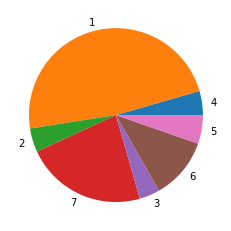

In [81]:
plt.pie(perc_values, labels = mylabels)